In [22]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler 

In [23]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [24]:
print("x_train shape", X_train.shape)  
print("y_train shape", y_train.shape)
print("x_test shape", X_test.shape)
print("y_test shape", y_test.shape)

x_train shape (404, 13)
y_train shape (404,)
x_test shape (102, 13)
y_test shape (102,)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [26]:
L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu',kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01)))
model.add(Dense(L2, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

In [29]:
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [30]:
history = model.fit(X_train, y_train, epochs =10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 53ms/step - loss: 542.7139 - mae: 21.3844 - val_loss: 515.4630 - val_mae: 20.7935
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 466.9294 - mae: 19.5659 - val_loss: 436.9842 - val_mae: 18.8342
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 393.2630 - mae: 17.6673 - val_loss: 359.9943 - val_mae: 16.7520
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 323.4867 - mae: 15.6956 - val_loss: 285.9967 - val_mae: 14.6646
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 256.4213 - mae: 13.6197 - val_loss: 218.4638 - val_mae: 12.5778
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 195.6105 - mae: 11.5350 - val_loss: 161.9405 - val_mae: 10.6905
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 145.1221 - mae: 9.7260 - val_loss: 121.9648 - val_mae: 9.0622
Epoch 8/10
5/5 [==============================] - 0s 14ms

<Figure size 640x480 with 0 Axes>

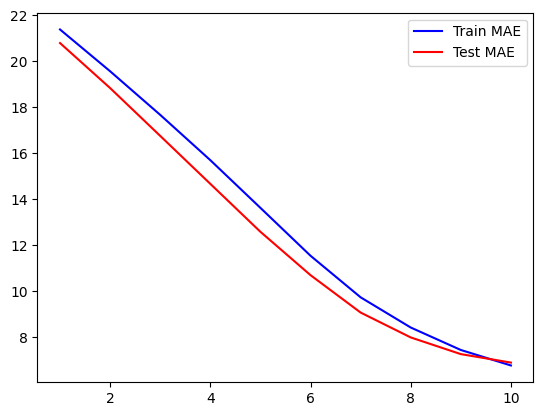

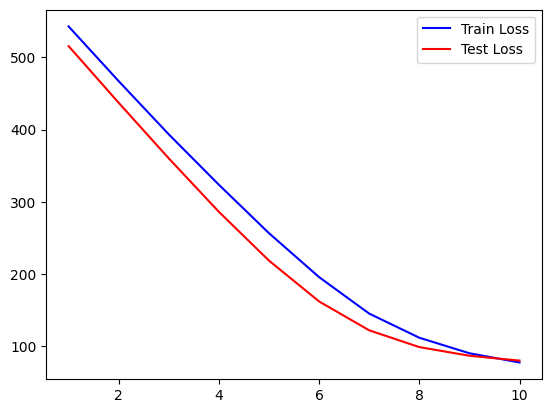

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Train MAE')
plt.plot(epochs, val_acc, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

In [32]:
L1 = 100
L2 = 100
L3 = 100 

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu'))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(L2, activation= 'relu'))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(L3, activation= 'relu'))
model2.add(Dropout(rate = 0.2))

model2.add(Dense(1, activation= 'linear'))

In [33]:
model2.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [34]:
history2 = model2.fit(X_train, y_train, epochs =10, 
                    batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 562.7357 - mae: 21.8735 - val_loss: 567.9717 - val_mae: 22.0009
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 523.9722 - mae: 20.9243 - val_loss: 522.3534 - val_mae: 20.9189
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 473.3949 - mae: 19.6745 - val_loss: 459.9168 - val_mae: 19.3488
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 404.2240 - mae: 17.8912 - val_loss: 374.2183 - val_mae: 17.1102
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 317.4976 - mae: 15.4684 - val_loss: 268.2274 - val_mae: 14.1858
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 221.8024 - mae: 12.3747 - val_loss: 162.8034 - val_mae: 10.7526
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 138.5752 - mae: 9.2745 - val_loss: 97.4129 - val_mae: 7.7756
Epoch 8/10
5/5 [==============================] - 0s 10ms/

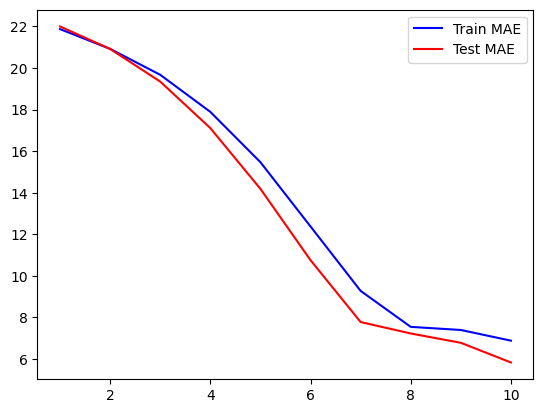

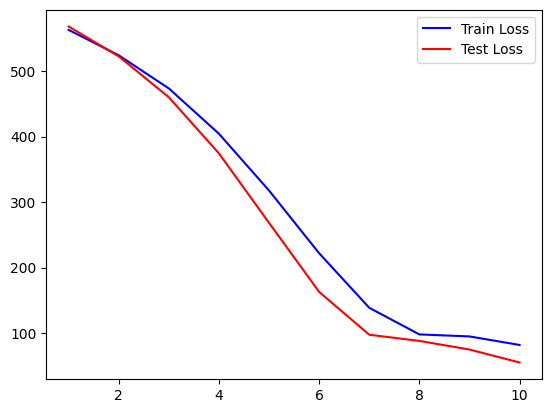

In [35]:
import matplotlib.pyplot as plt

acc2 =history2.history['mae']
val_acc = history2.history['val_mae']
loss2 = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [36]:
L1 = 100
L2 = 100
L3 = 100 

model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L2, activation= 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))

model3.add(Dense(1,activation='linear')) 

model3.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

early_stopping_monitor =EarlyStopping(patience = 5)

history3 = model3.fit(X_train, y_train, epochs = 10, 
                      batch_size = 100, validation_data = (X_test, y_test), 
                      callbacks= [early_stopping_monitor])

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 582.2637 - mae: 22.3284 - val_loss: 591.2677 - val_mae: 22.5314
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 551.9526 - mae: 21.5983 - val_loss: 560.8890 - val_mae: 21.8188
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 518.3911 - mae: 20.7678 - val_loss: 519.3441 - val_mae: 20.8137
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 472.2069 - mae: 19.5647 - val_loss: 459.0948 - val_mae: 19.2863
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 406.6725 - mae: 17.8937 - val_loss: 375.7560 - val_mae: 17.1423
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 321.2659 - mae: 15.5821 - val_loss: 268.4921 - val_mae: 14.3108
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 217.4907 - mae: 12.4271 - val_loss: 154.8451 - val_mae: 10.5906
Epoch 8/10
5/5 [==============================] - 0s 11

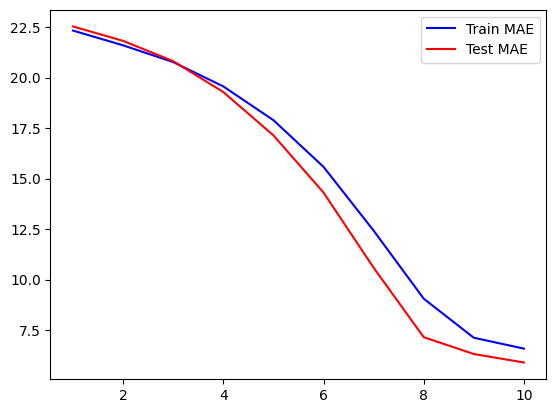

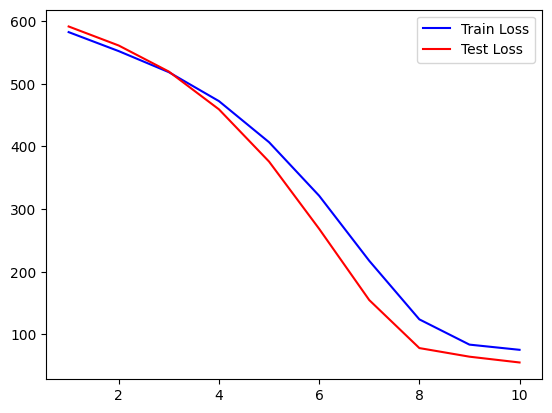

In [37]:
import matplotlib.pyplot as plt

acc2 =history3.history['mae']
val_acc = history3.history['val_mae']
loss2 = history3.history['loss']
val_loss = history3.history['val_loss'] #validation loss
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [39]:
L1 = 100
L2 = 100
L3 = 100 

model4 = Sequential()
model4.add(Dense(L1, input_dim = 13, activation = 'relu'))
model4.add(Dense(L2, activation= 'relu'))
model4.add(Dense(L3, activation= 'relu'))

model4.add(Dense(1,activation='linear')) 

model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

early_stopping_monitor =EarlyStopping(patience = 5)

history4 = model4.fit(X_train, y_train, epochs = 20, 
                      batch_size = 100, validation_data = (X_test, y_test), 
                      callbacks= [early_stopping_monitor])

Epoch 1/20
5/5 [==============================] - 1s 50ms/step - loss: 578.4968 - mae: 22.2323 - val_loss: 578.5601 - val_mae: 22.2834
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 540.5083 - mae: 21.3767 - val_loss: 537.0491 - val_mae: 21.3389
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 498.9099 - mae: 20.3715 - val_loss: 484.3632 - val_mae: 20.0624
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 442.7411 - mae: 18.9615 - val_loss: 411.3586 - val_mae: 18.1364
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 364.8893 - mae: 16.8280 - val_loss: 312.5972 - val_mae: 15.4446
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 264.8550 - mae: 13.8129 - val_loss: 200.8703 - val_mae: 11.9841
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 156.4200 - mae: 10.2741 - val_loss: 113.0452 - val_mae: 8.7116
Epoch 8/20
5/5 [==============================] - 0s 14m

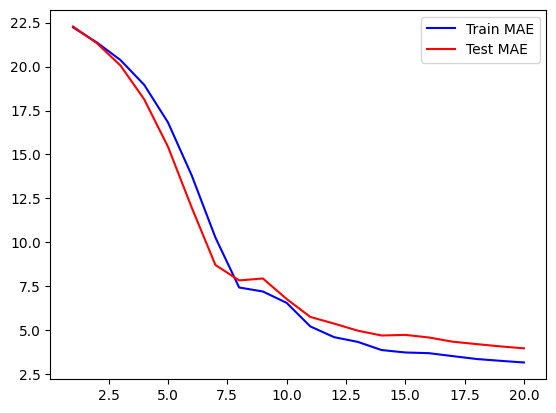

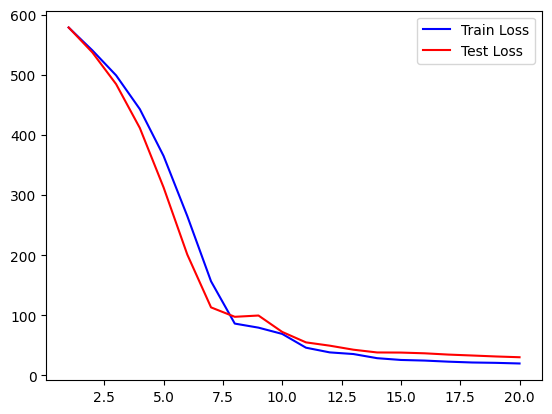

In [40]:
import matplotlib.pyplot as plt

acc2 =history4.history['mae']
val_acc = history4.history['val_mae']
loss2 = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()